In [0]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import glob
import cv2

%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, SpatialDropout2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.applications import VGG16

import os
import random

In [14]:
#Mounting google drive into google collaboratory
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
!ls '/content/drive/My Drive/Colab Notebooks/Research/Data'

coordinate_data.csv		      image_data.csv
coordinate_data.gsheet		      image_data.gsheet
coordinate_data_without_index.csv     nuclei.csv
coordinate_data_without_index.gsheet  nuclei.gsheet
gray_data_without_index.csv	      original.jpg
gray_data_without_index.gsheet


In [16]:
#Specifying the data path
img_path = "/content/drive/My Drive/Colab Notebooks/Research/Data/original.jpg"

#Reading the image
img = cv2.imread(img_path)

#Finding the shize of the image
original_size = img.shape
print(original_size)

(4650, 4650, 3)


In [0]:
#Creating a function to preprocess images
def preprocess(image):
    
    #Reading the image
    img = cv2.imread(image)
    
    #Resizing all images to a size of 128 x 128
    img = cv2.resize(img, (128,128))
    
    #Returning the image
    return img

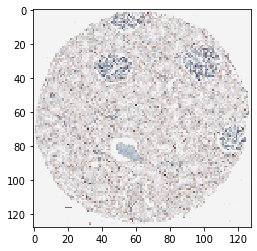

In [18]:
#Preprocessing the image
img = preprocess(img_path)

plt.imshow(img)

In [19]:
print(img[75][97])

[202 192 194]


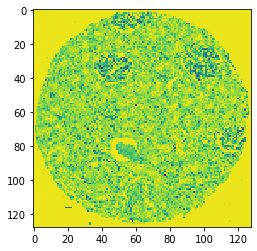

In [20]:
#Copying the image into a temporary image
test_img = np.copy(img)

#Converting the copied image into grayscale
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

#Plotting the grayscale image
plt.imshow(gray_img)

In [0]:
#Converting the gray image into a Dataframe
gray_img_data = pd.DataFrame(gray_img)

#Converting it into a csv file
gray_img_data.to_csv("/content/drive/My Drive/Colab Notebooks/Research/Data/gray_data_without_index.csv", index = False)

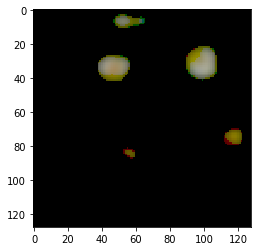

In [22]:
#Using mean filtering to remove noise
blur_img = cv2.blur(test_img, (5,5))

#Changing the color of pixel values greater than 200 to black
blur_img[(blur_img >= 200)] = 0

#Recursively using mean filtering to remove noise
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))

#Changing the color of pixel values less than 80 to black
blur_img[(blur_img <= 80)] = 0

#Plotting the image with reduced noise
plt.imshow(blur_img)

In [0]:
#Converting to grayscale
gray_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)

In [0]:
#Converting the smoothened image into a Dataframe
image_data = pd.DataFrame(gray_img)

#Converting it into a csv file
image_data.to_csv("/content/drive/My Drive/Colab Notebooks/Research/Data/coordinate_data_without_index.csv", index = False)

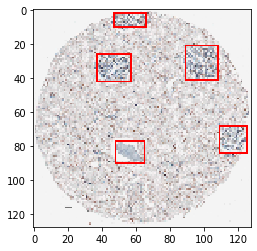

In [25]:
#Copying the original image
temp_data = np.copy(img)

#Drawing rectangles around the nuclei
cv2.rectangle(temp_data, (47,2), (66,10), (255,0,0))
cv2.rectangle(temp_data, (37,26), (57,42), (255,0,0))
cv2.rectangle(temp_data, (89,21), (108,41), (255,0,0))
cv2.rectangle(temp_data, (109,68), (125,84), (255,0,0))
cv2.rectangle(temp_data, (48,77), (65,90), (255,0,0))

#Plotting the data with boxes
plt.imshow(temp_data)

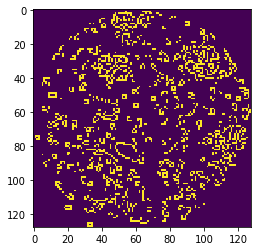

In [50]:
#Creating a copy of the original image
test_img1 = np.copy(img)

#Detecting edges in the image
edge_data = cv2.Canny(test_img1, 200, 250)

plt.imshow(edge_data)

In [51]:
pd.DataFrame(edge_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


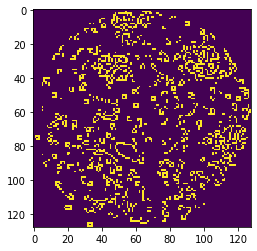

In [52]:
#Creating a function to make glomeruli values to 0
def img_transform(img, x1, y1, x2, y2):
  for i in range(47,67):
    for j in range(6,11):
      edge_data[i][j] = 0

#Making all glomeruli black
img_transform(edge_data, 47, 2, 66, 10)
img_transform(edge_data, 37, 26, 57, 42)
img_transform(edge_data, 89, 21, 108, 41)
img_transform(edge_data, 109, 68, 125, 84)
img_transform(edge_data, 48, 77, 65, 90)

plt.imshow(edge_data)

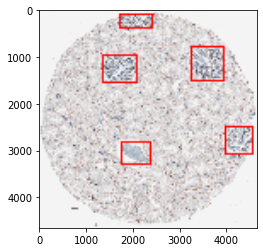

In [54]:
#Upsampling the image
#temp_data = cv2.pyrUp(temp_data, original_size)
temp_data = cv2.resize(temp_data, (original_size[0],original_size[1]))

#Plotting the sampled image
plt.imshow(temp_data)